In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from helpFunctions import *
import os
import warnings
warnings.filterwarnings('ignore')
%pylab inline
%load_ext autoreload
%autoreload 2
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 12})
years, data, varNamesOverYears, varNamesOverYearsPlus = loadData()

Populating the interactive namespace from numpy and matplotlib


### numbers and asset holding of all banks over the years 

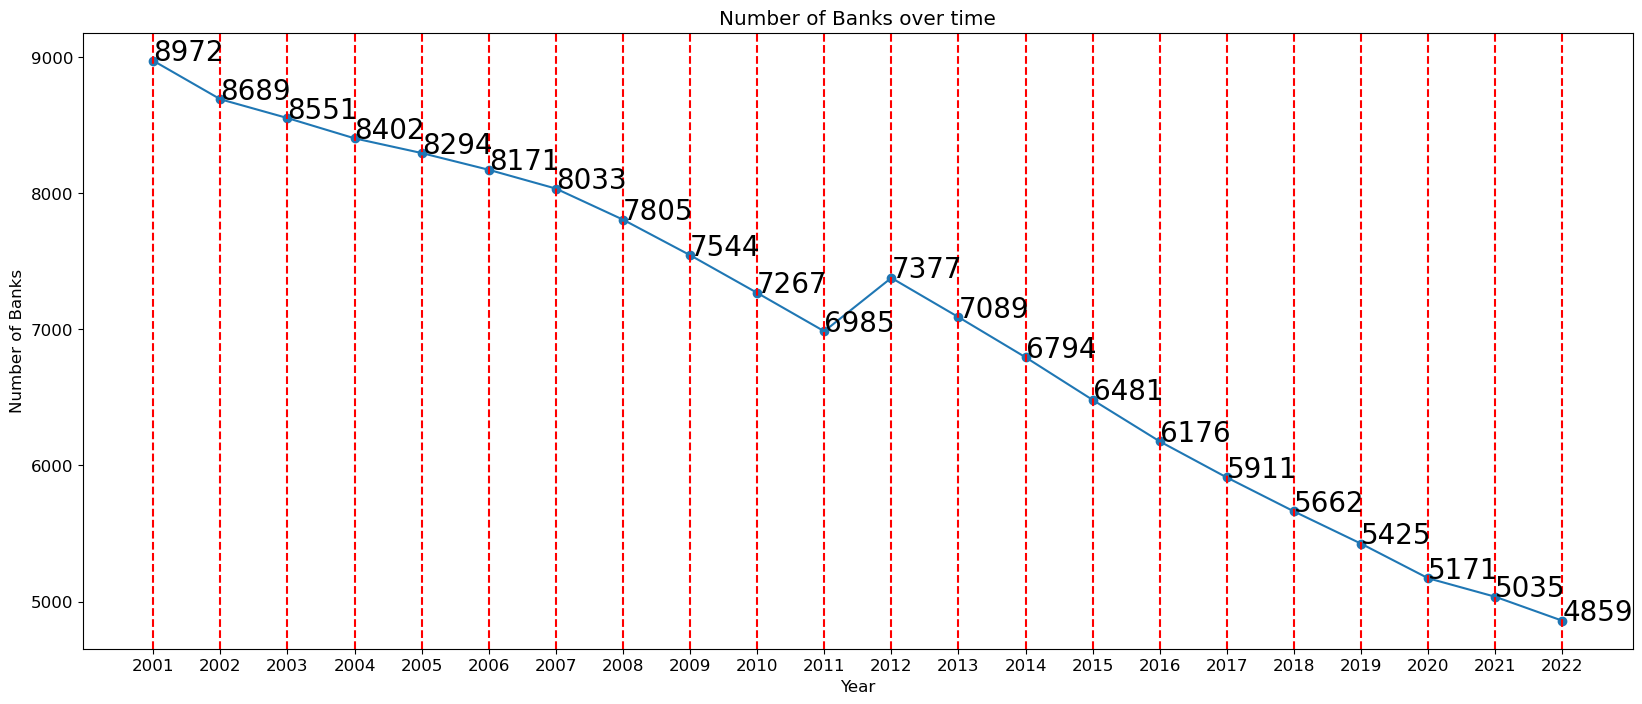

In [2]:
# numer of banks plot, create identifier by concatenating the first 10 columns
identifier = data[0].columns[2:11]
# numberOfBanks = [len(d[identifier].astype(str).agg('-'.join, axis=1).unique()) for d in data]
numberOfBanks = [len(d['IDRSSD'].unique()) for d in data]
plt.title("Number of Banks over time")
plt.plot(range(2001,2023), numberOfBanks, 'o-')
# show plot value on the plot
for x,y in zip(range(2001,2023), numberOfBanks):
    plt.text(x, y, str(y), fontsize=20)
plt.xlabel("Year")
plt.ylabel("Number of Banks")
# plot vertial line for every year  
for i in range(2001,2023):
    plt.axvline(x=i, color='r', linestyle='--')
# show all xticks
plt.xticks(range(2001,2023))
plt.show()

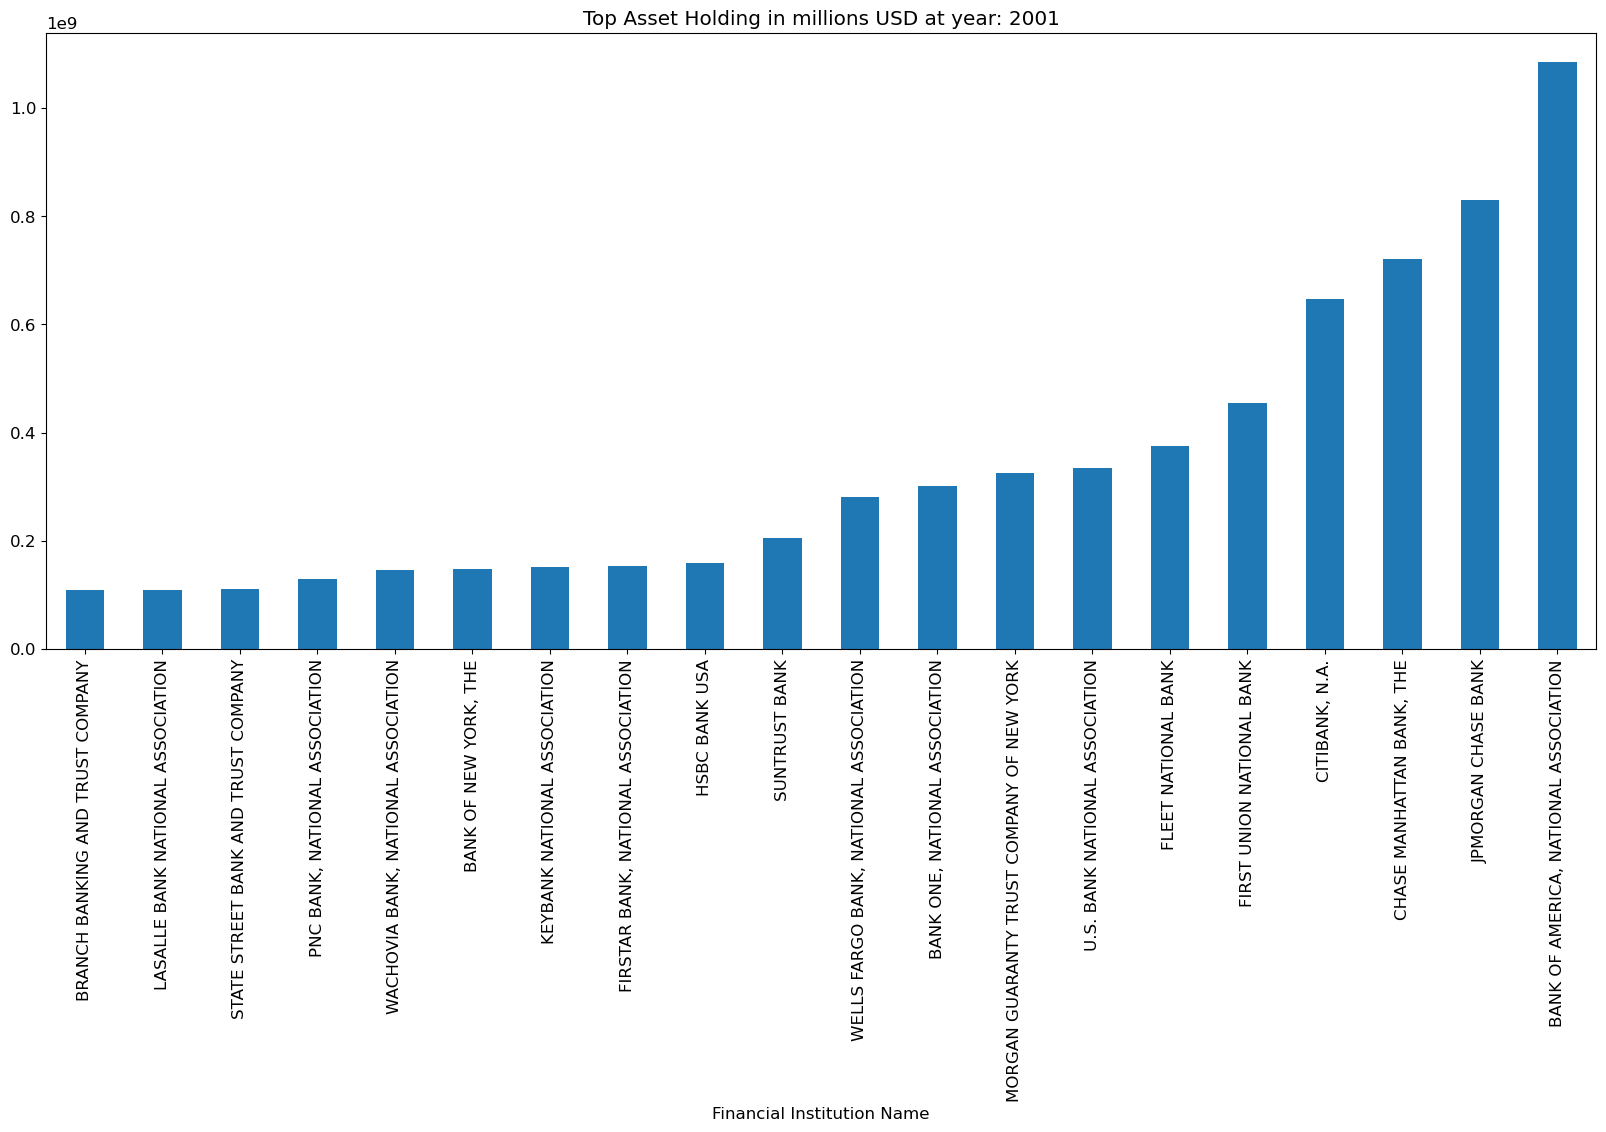

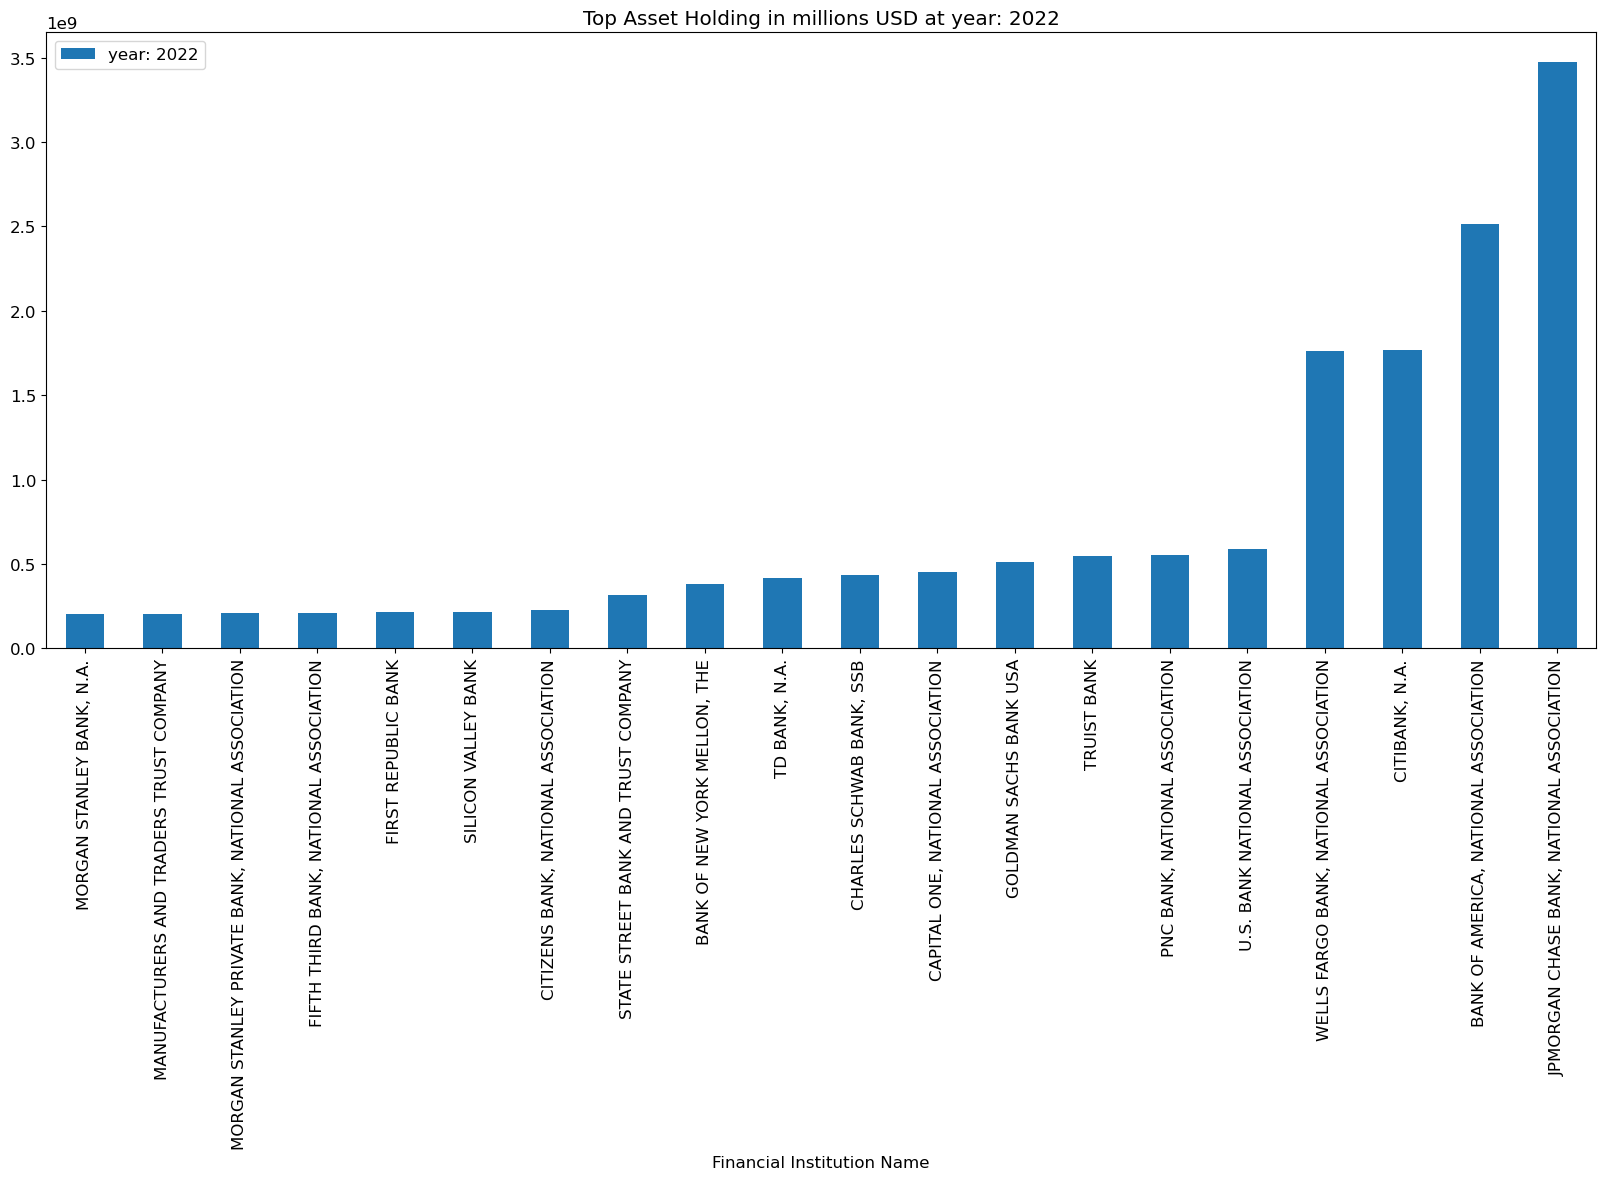

In [3]:
for year in [2001,2022]:
    plt.figure()
    plt.title("Top Asset Holding in millions USD at year: " + str(year))
    var, ddd = call(["TOTAL ASSETS",], year)
    assetValues = ddd.groupby("Financial Institution Name")[var].max().sort_values()[-20:].plot.bar(label=f"year: {year}")
plt.legend()

In [4]:
dfs = []
for year in [2001,2022]:
    var, ddd = call(["TOTAL ASSETS"], year)
    dfs.append(ddd.groupby("Financial Institution Name")[var].max().sort_values(ascending=False)[:20])
df = pd.concat([d.reset_index() for d in dfs], axis=1)
df.columns = ["Financial Institution Name", "2001 asset value", "Financial Institution Name", "2022 asset value"]
df

,Financial Institution Name,2001 asset value,Financial Institution Name,2022 asset value
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",1.084464e+09,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",3.476711e+09
1,JPMORGAN CHASE BANK,8.298440e+08,"BANK OF AMERICA, NATIONAL ASSOCIATION",2.513619e+09
2,"CHASE MANHATTAN BANK, THE",7.204700e+08,"CITIBANK, N.A.",1.766752e+09
3,"CITIBANK, N.A.",6.469870e+08,"WELLS FARGO BANK, NATIONAL ASSOCIATION",1.764272e+09
4,FIRST UNION NATIONAL BANK,4.549460e+08,U.S. BANK NATIONAL ASSOCIATION,5.912109e+08
5,FLEET NATIONAL BANK,3.750730e+08,"PNC BANK, NATIONAL ASSOCIATION",5.533952e+08
6,U.S. BANK NATIONAL ASSOCIATION,3.338981e+08,TRUIST BANK,5.462280e+08
7,MORGAN GUARANTY TRUST COMPANY OF NEW YORK,3.261370e+08,GOLDMAN SACHS BANK USA,5.139050e+08
8,"BANK ONE, NATIONAL ASSOCIATION",3.021459e+08,"CAPITAL ONE, NATIONAL ASSOCIATION",4.533132e+08
9,"WELLS FARGO BANK, NATIONAL ASSOCIATION",2.809890e+08,"CHARLES SCHWAB BANK, SSB",4.346270e+08


### Total Assets and Total Liability 

In [5]:
# overnight borrowing
overnightBorrowing = aggregateSumOverYears("FEDERAL FUNDS PURCHASED IN DOMESTIC OFFICES", 
                          "overnight", 
                          2002,
                          2022)

# short term borrowing
shortTermBorrowing = aggregateSumOverYears("SECURITIES SOLD UNDER AGREEMENTS TO REPURCHASE", 
                          "shortTerm", 
                          2002,
                          2022)

# long term borrowing
longTermBorrowing= aggregateSumOverYears("OTHER BORROWED MONEY", 
                          "longTerm", 
                          2001,
                          2022)

# reserved cash
reservedCash = aggregateSumOverYears("UNDIVIDED PROFITS AND CAPITAL RESERVES", 
                          "cash", 
                          2001,
                          2022)

# fed funds rate 
fedRate = pd.read_csv("FEDFUNDS.csv")
fedRate["DATE"] = pd.to_datetime(fedRate["DATE"], format="%Y-%m-%d")
annualizedFedRate = fedRate.groupby(fedRate.DATE.dt.year).mean()

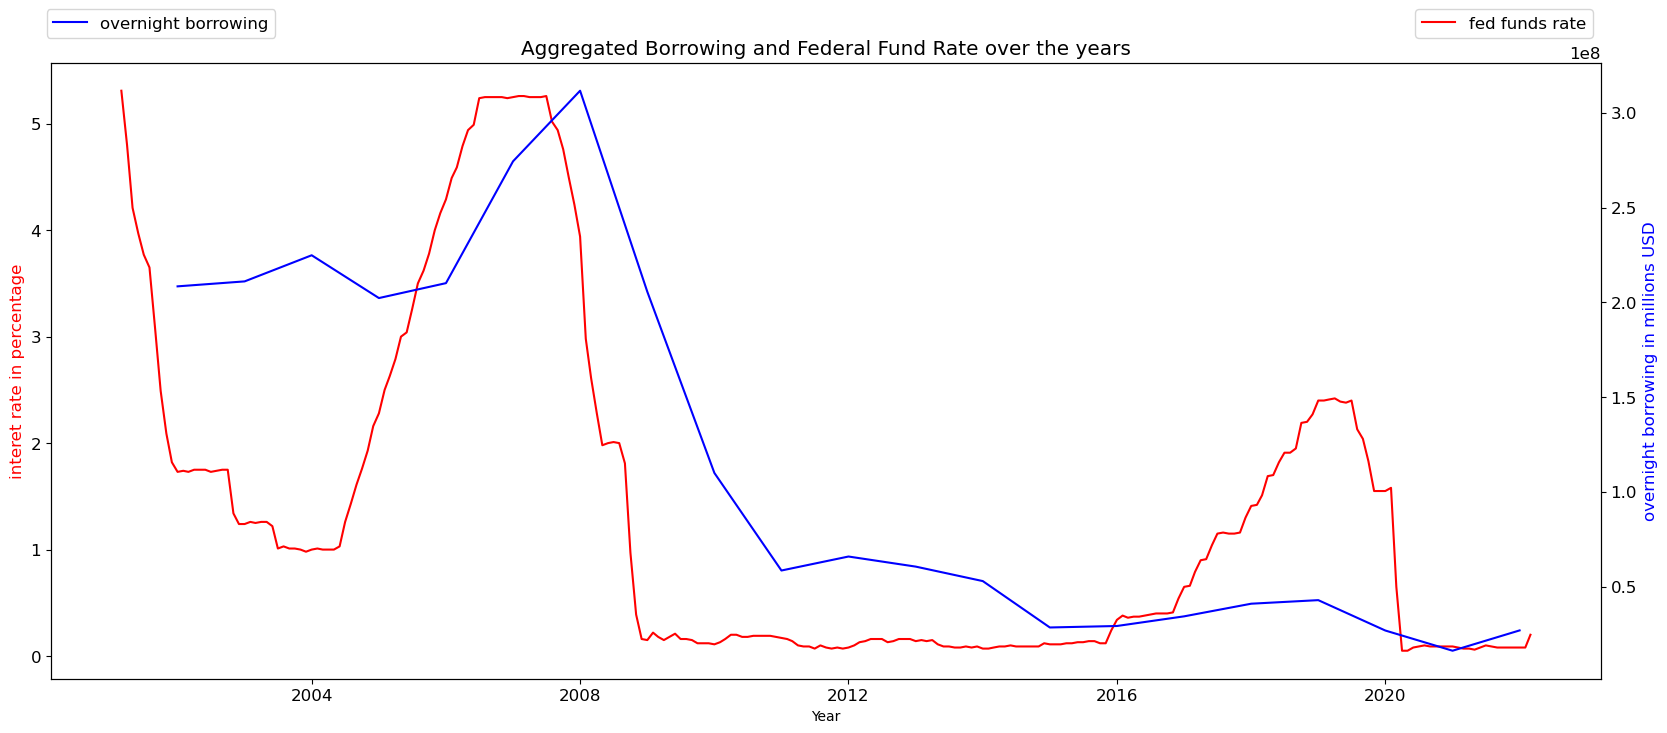

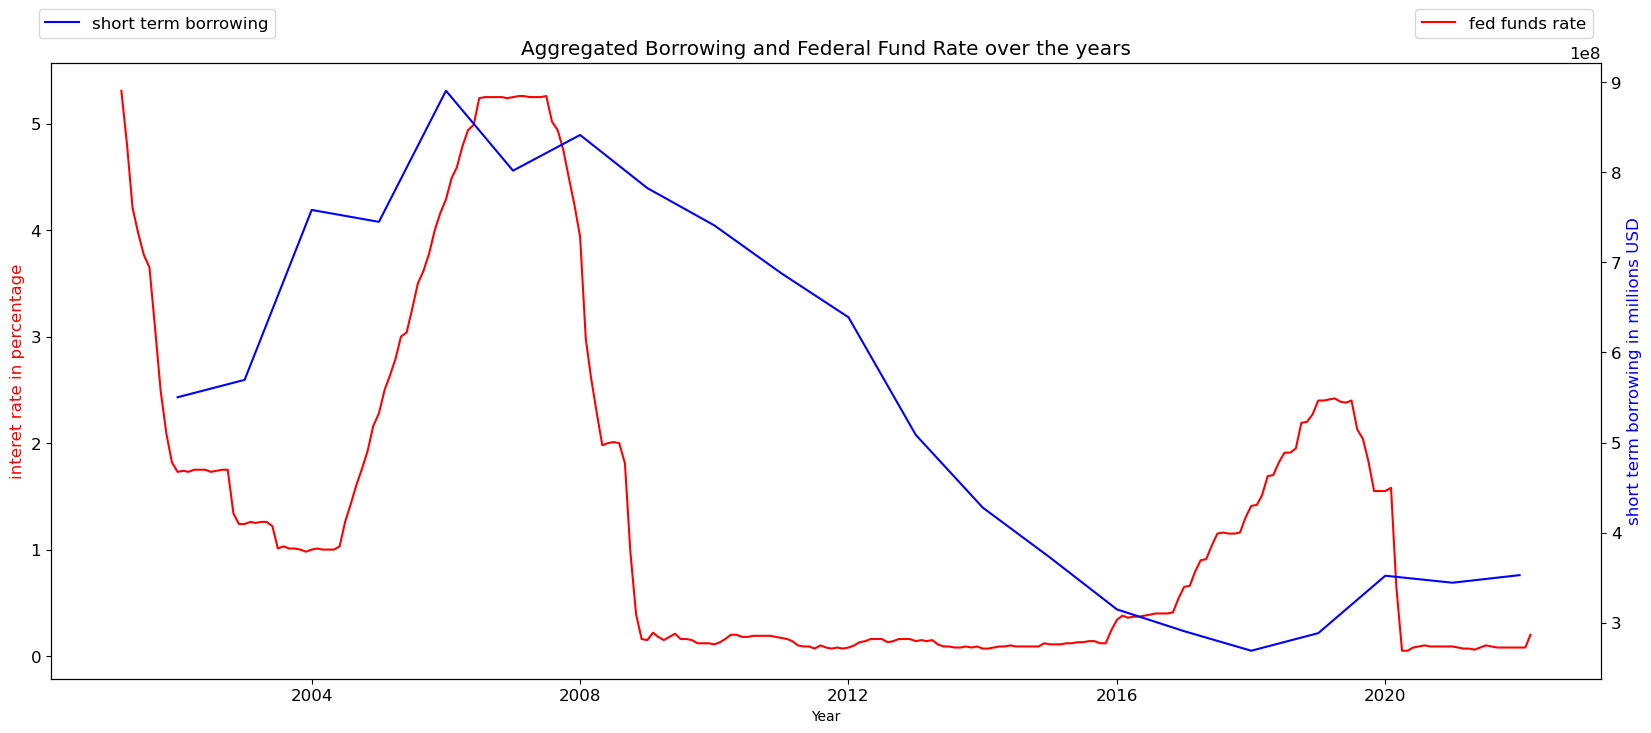

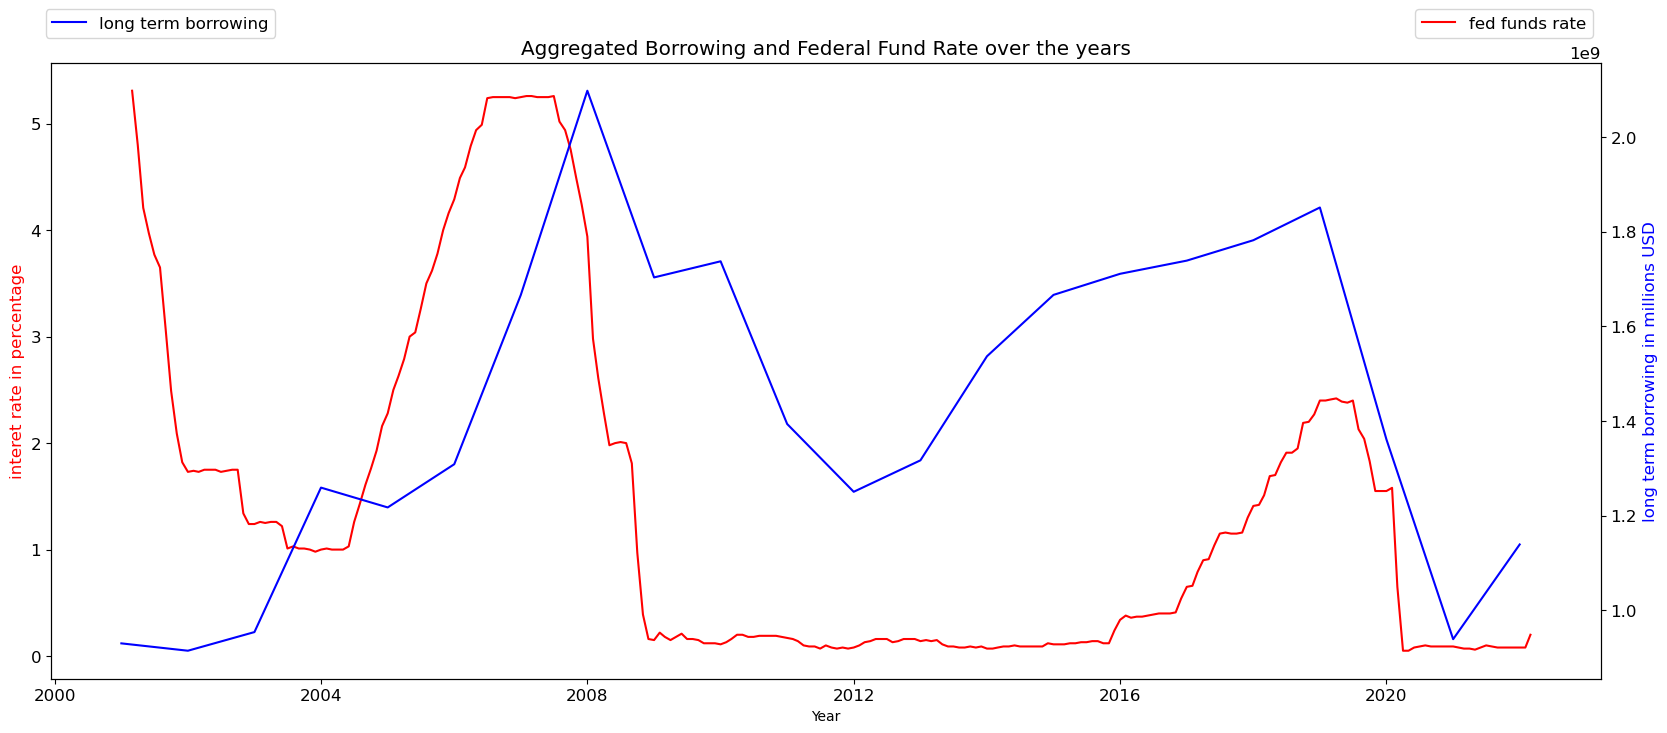

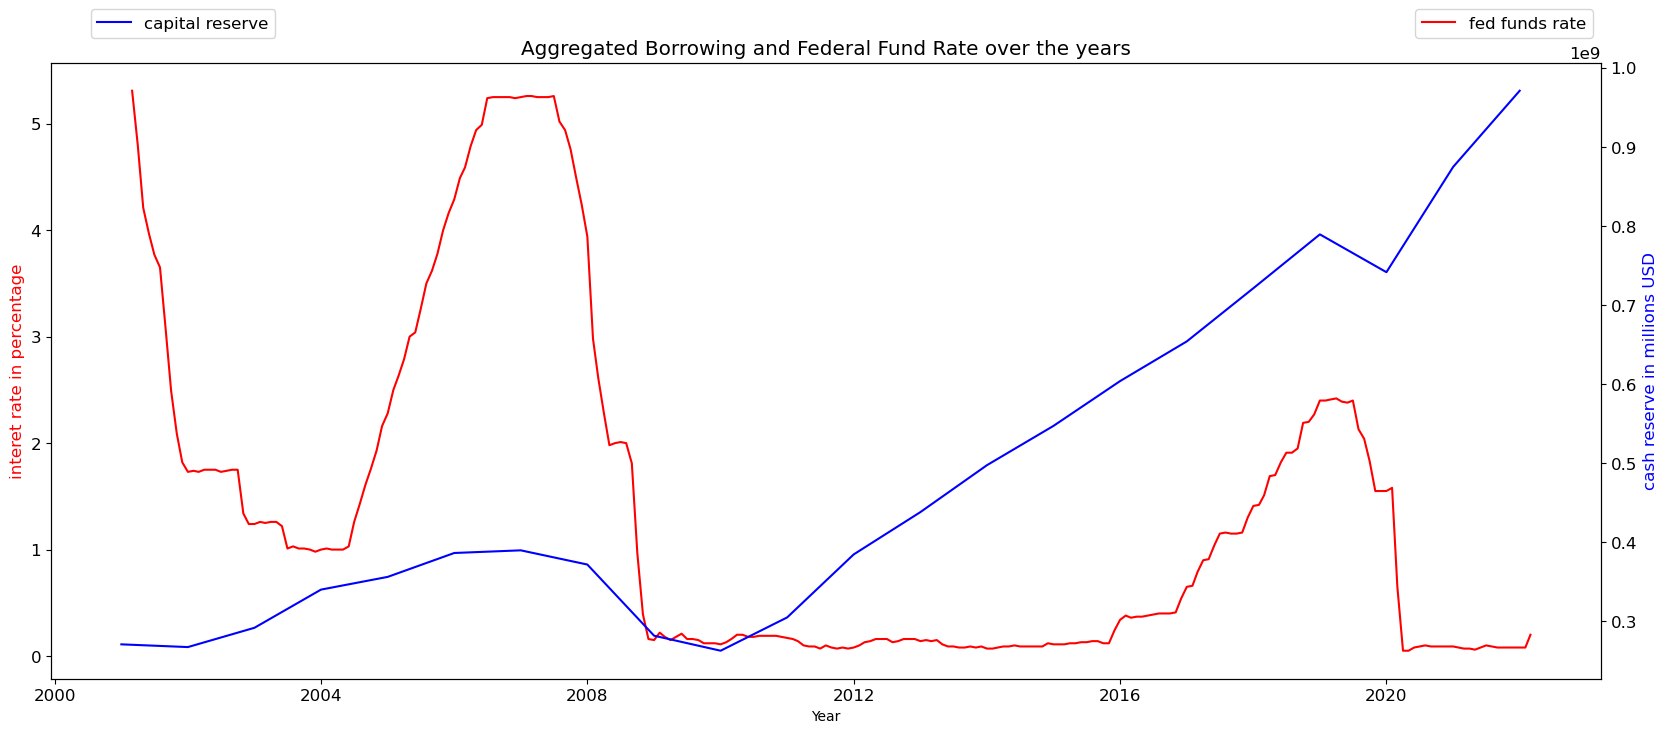

In [6]:
# fed rates and overnight borrowing overlay 
comparisonPlotsOverYears(fedRate, overnightBorrowing, 
                         label1 = "fed funds rate", 
                         label2 = "overnight borrowing", 
                         ylabel1 = "interet rate in percentage", 
                         ylabel2 = "overnight borrowing in millions USD")
# fed rates and short term borrowing overlay 
comparisonPlotsOverYears(fedRate, shortTermBorrowing,
                         label1="fed funds rate",
                         label2="short term borrowing",
                         ylabel1="interet rate in percentage",
                         ylabel2="short term borrowing in millions USD")
# fed rates and long term borrowing overlay 
comparisonPlotsOverYears(fedRate, longTermBorrowing,
                         label1="fed funds rate",
                         label2="long term borrowing",
                         ylabel1="interet rate in percentage",
                         ylabel2="long term borrowing in millions USD")
# fed rates and cash reserve overlay
comparisonPlotsOverYears(fedRate, reservedCash,
                         label1="fed funds rate",
                         label2="capital reserve",
                         ylabel1="interet rate in percentage",
                         ylabel2="cash reserve in millions USD")


In [7]:
# overnight lending
overnightLending = aggregateSumOverYears("FEDERAL FUNDS SOLD", 
                          "overnight", 
                          2002,
                          2022)

# short term lending
shortTermLending = aggregateSumOverYears("SECURITIES PURCHASED UNDER AGREEMENTS TO RESELL", 
                          "shortTerm", 
                          2002,
                          2022)

# long term lending
keyWords = ["Loans to depository institutions"]
loansNames = searchVar(keyWords, varNamesOverYearsPlus, show=False)
longTermLending= aggregateSumOverYears(loansNames, 
                          "longTerm", 
                           2001,
                           2022)

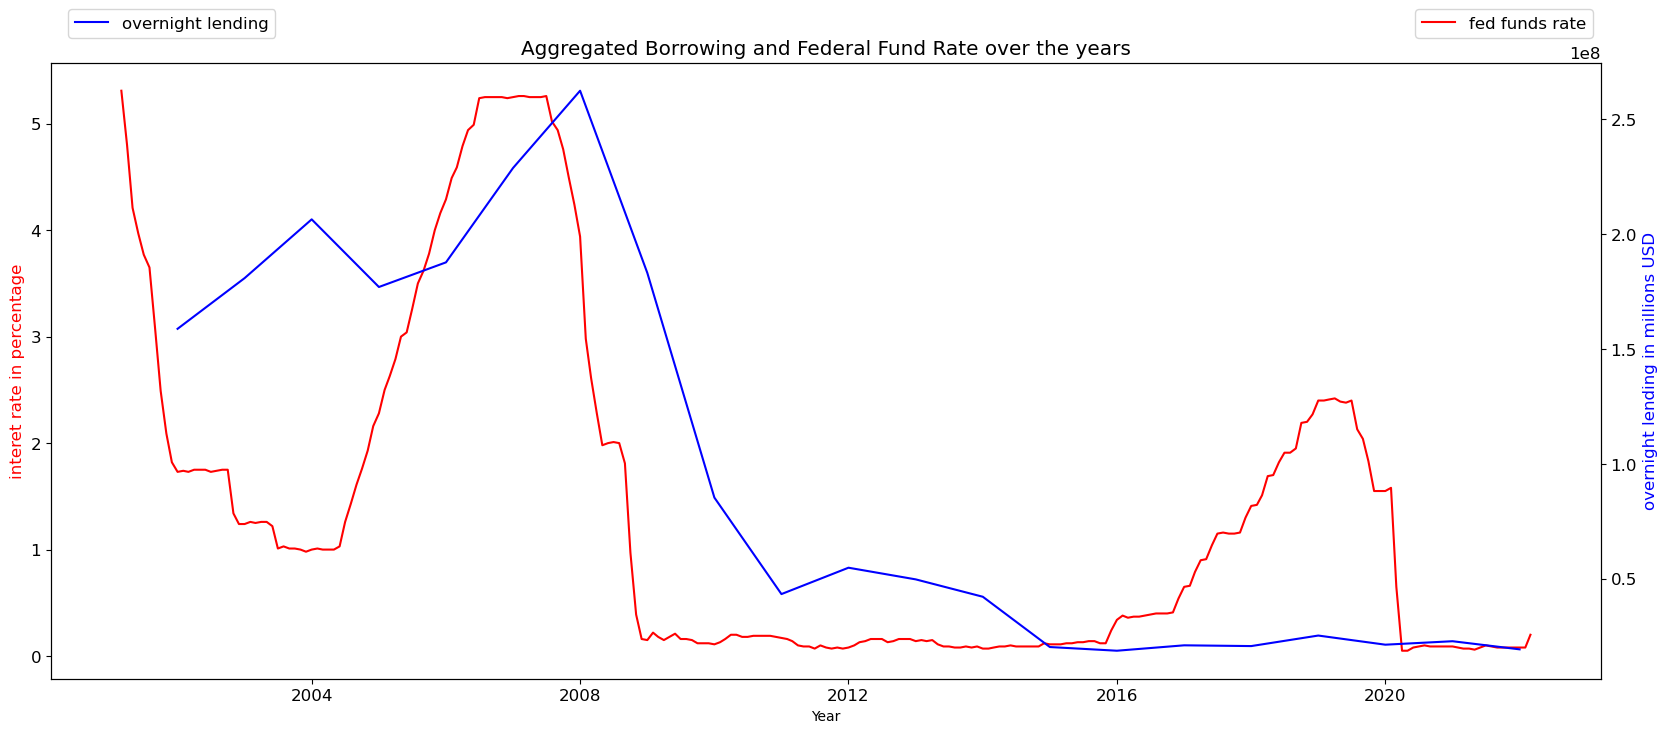

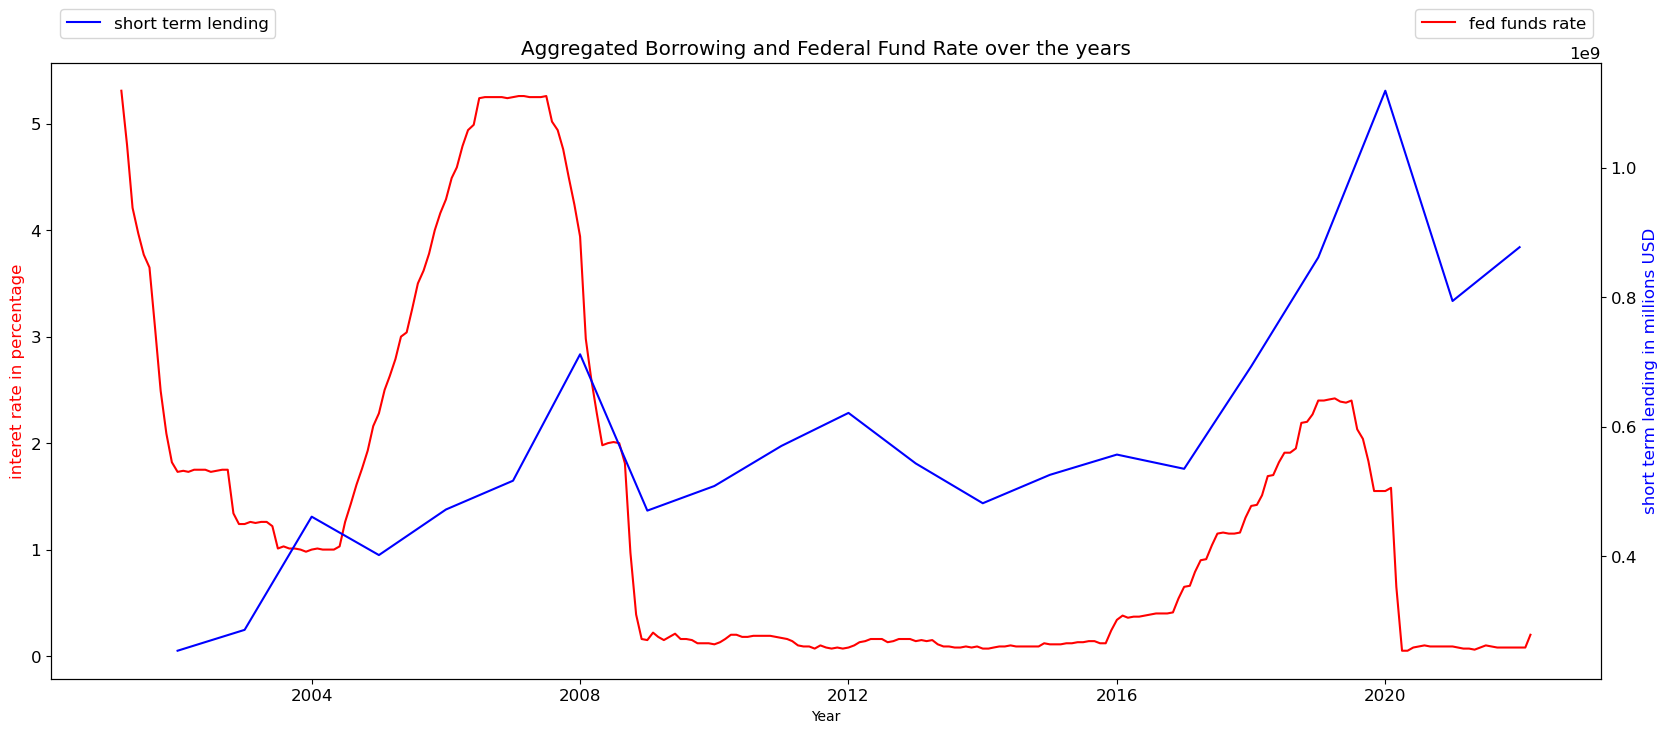

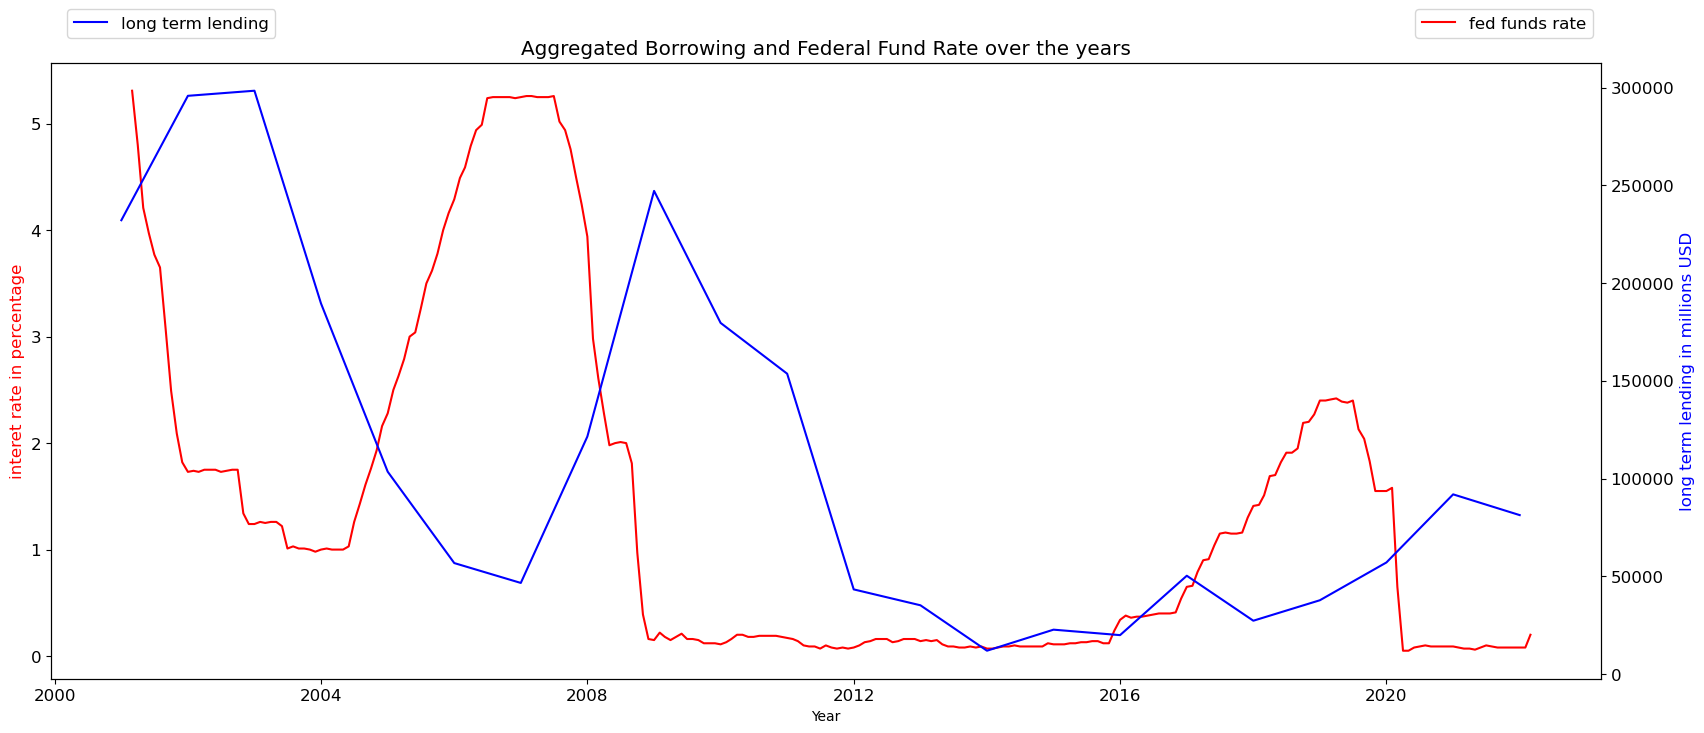

In [8]:
# fed rates and overnight lending overlay 
comparisonPlotsOverYears(fedRate, overnightLending, 
                         label1 = "fed funds rate", 
                         label2 = "overnight lending", 
                         ylabel1 = "interet rate in percentage", 
                         ylabel2 = "overnight lending in millions USD")
# fed rates and short term lending overlay 
comparisonPlotsOverYears(fedRate, shortTermLending,
                         label1="fed funds rate",
                         label2="short term lending",
                         ylabel1="interet rate in percentage",
                         ylabel2="short term lending in millions USD")
# fed rates and long term lending overlay 
comparisonPlotsOverYears(fedRate, longTermLending,
                         label1="fed funds rate",
                         label2="long term lending",
                         ylabel1="interet rate in percentage",
                         ylabel2="long term lending in millions USD")

### Investigate if the balance sheet is balance?

In [9]:
import yfinance as yf
sp500 = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^GSPC",
        start="2000-01-01", end="2023-01-01",
        interval = "3mo"
    )
sp500Returns = sp500[sp500.index.dayofyear == 1]["Adj Close"].pct_change().dropna() * 100
sp500Returns.index = sp500Returns.index.year
sp500Returns

[*********************100%***********************]  1 of 1 completed


Date
2001   -22.571368
2002    -1.115195
2003   -26.077447
2004    32.779595
2005     4.828585
2006     9.679909
2007     9.729934
2008    -6.908495
2009   -39.678686
2010    46.568998
2011    13.374028
2012     6.233078
2013    11.410962
2014    19.318887
2015    10.444146
2016    -0.394117
2017    14.709623
2018    11.772455
2019     7.328258
2020    -8.813499
2021    53.714506
2022    14.033116
Name: Adj Close, dtype: float64

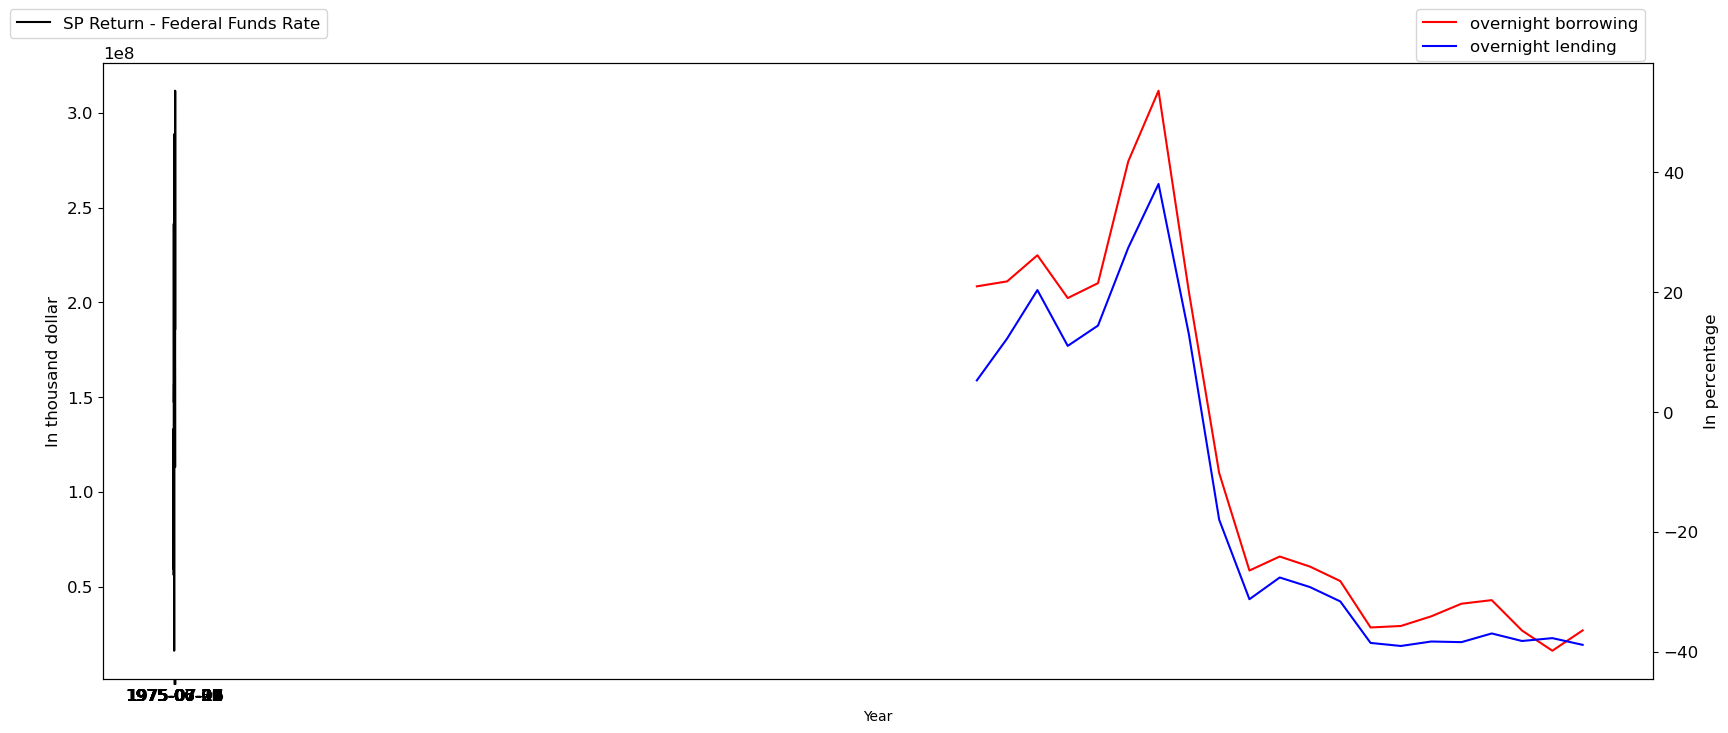

In [10]:
# overnight borrowing and overnight lending overlay
df1 = overnightBorrowing
df2 = overnightLending
df3 = sp500Returns
label1="overnight borrowing"
label2="overnight lending"
ylabel1 = "In thousand dollar"
ylabel2 = "In percentage"

fig, ax = plt.subplots()
ax.plot(df1.index, df1[df1.columns[0]],"r", label=label1)
ax.plot(df2.index, df2[df2.columns], 'b', label=label2)
ax.set_ylabel(ylabel1, color='k', fontsize=12)
ax.legend(bbox_to_anchor=(1, 1.1))
ax1 = ax.twinx()
ax.set_xlabel('Year', fontsize=10)
ax1.plot(annualizedFedRate.index, df3.values - annualizedFedRate.values.T[0], 'k', label="SP Return - Federal Funds Rate")
ax1.set_ylabel(ylabel2, color='k', fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1.1))
plt.xticks(range(2001,2023))
plt.show()

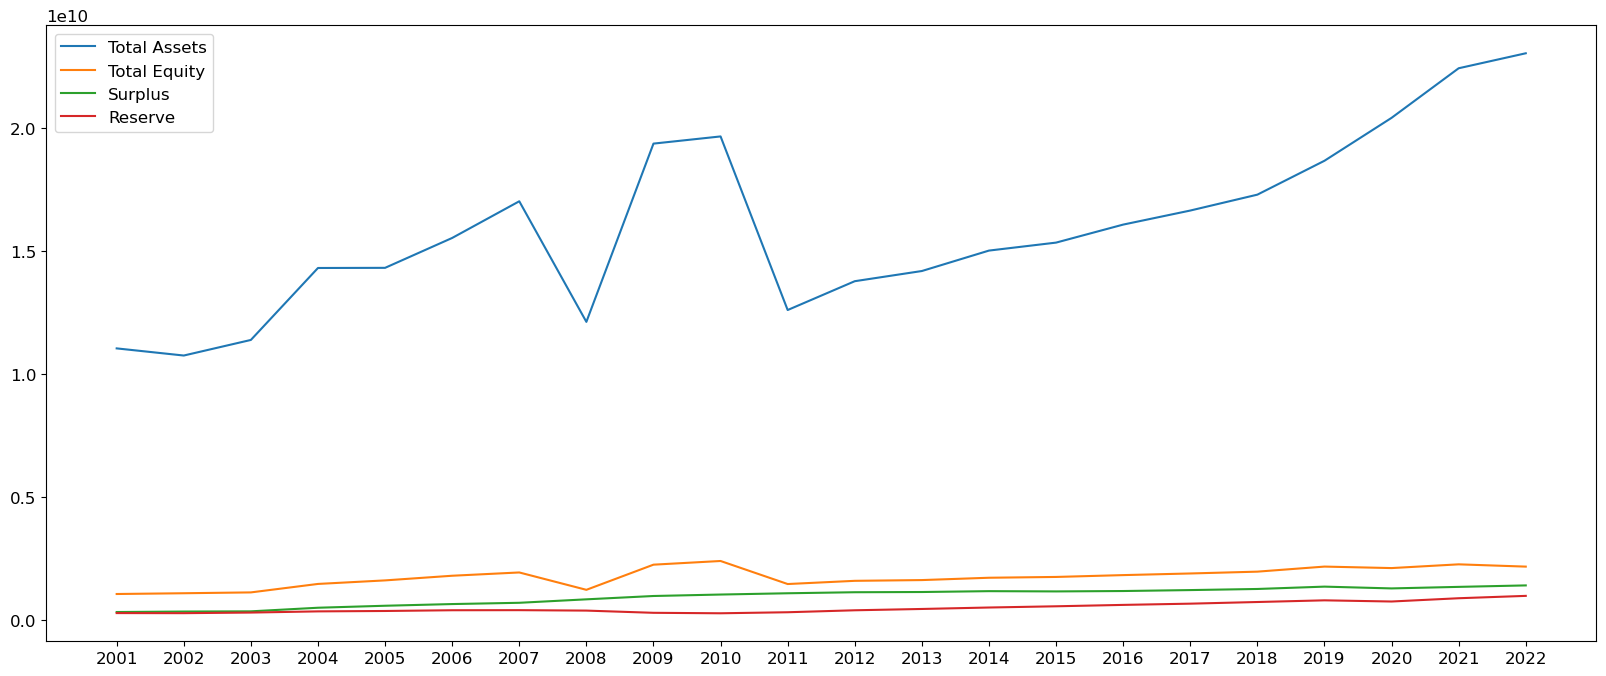

In [11]:
# total asset and total liability overlay
totalAssets = aggregateSumOverYears("TOTAL ASSETS", "total assets", 2001, 2022)
totalLiabilities = aggregateSumOverYears("TOTAL LIABILITIES AND MINORITY INTEREST", "total liabilities", 2001, 2022) 
totalSurplus = aggregateSumOverYears("SURPLUS", "surplus", 2001, 2022)
totalReserve = aggregateSumOverYears("UNDIVIDED PROFITS AND CAPITAL RESERVES", "reserve", 2001, 2022)


plt.plot(range(2001,2023), totalAssets, label="Total Assets")
# plt.plot(range(2001,2023), totalLiabilities, label="Total Liability")
plt.plot(range(2001,2023), totalAssets.values - totalLiabilities.values, label="Total Equity")
plt.plot(range(2001,2023), totalSurplus, label="Surplus")
plt.plot(range(2001,2023), totalReserve, label="Reserve")
plt.xticks(range(2001,2023))
plt.legend()

IndexError: index 1 is out of bounds for axis 0 with size 1

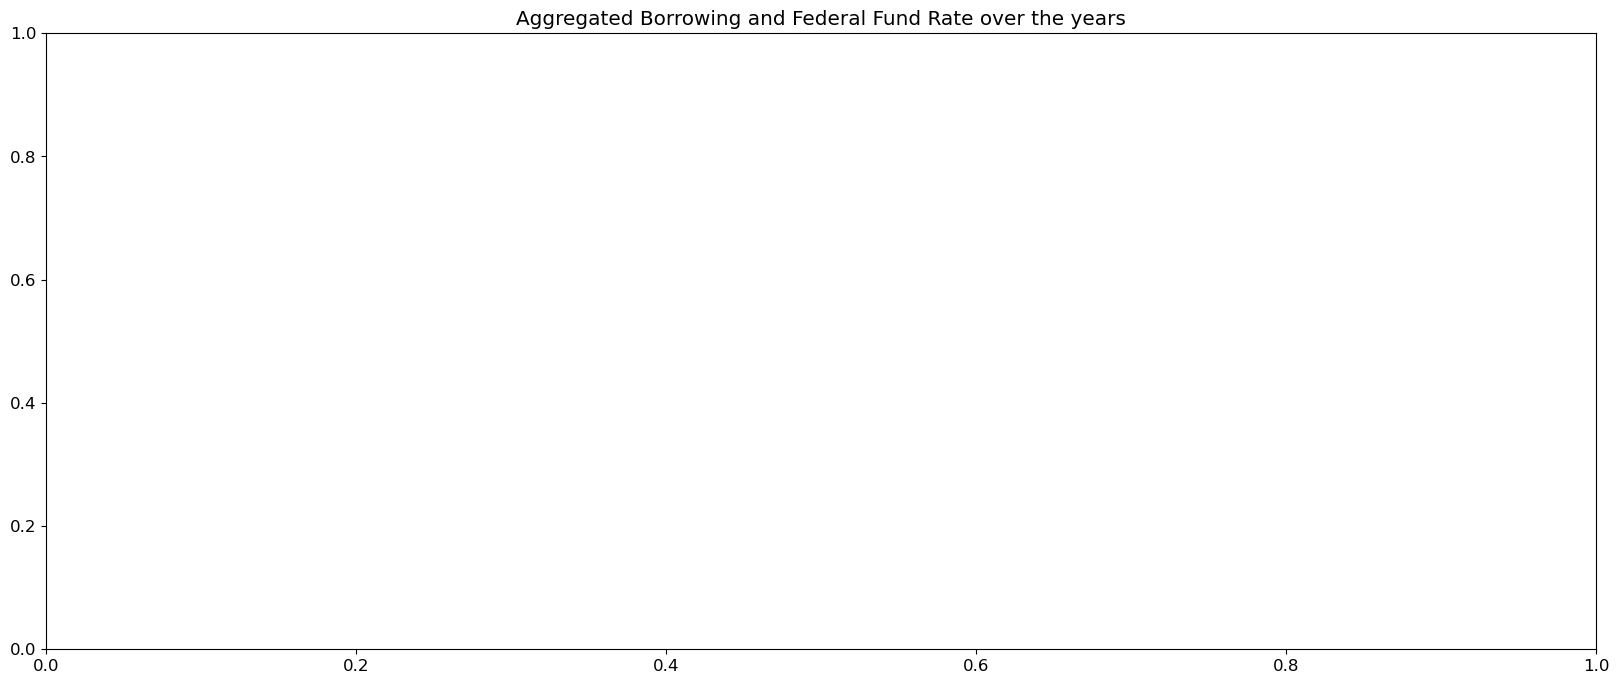

In [12]:
leverage = pd.DataFrame(columns=["leverage"], data = totalAssets.values / (totalAssets.values - totalLiabilities.values), index=totalAssets.index)

comparisonPlotsOverYears(leverage, annualizedFedRate,
                         label1="leverage",
                         label2="fedRate",
                         ylabel1="leverage",
                         ylabel2="fedRate")

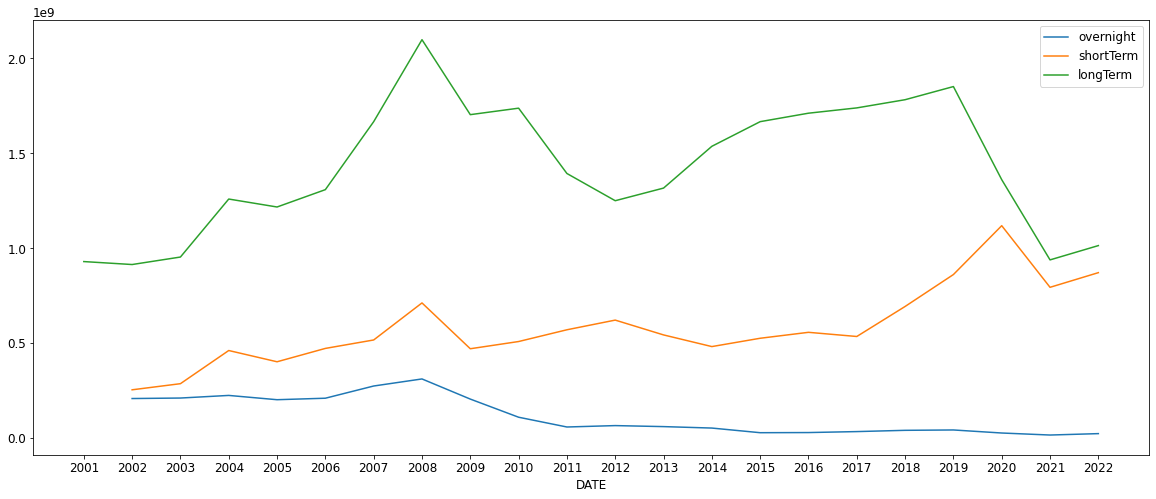

In [ ]:
# Create a figure with 3 subplots
fig, axs = plt.subplots()
# Plot the data
overnightBorrowing.plot(ax = axs, label="overnight borrowing")
shortTermBorrowing.plot(ax = axs, label="short-term borrowing")
longTermBorrowing.plot(ax = axs, label="long-term borrowing")
plt.xticks(range(2001,2023))
plt.legend()

In [ ]:
import yfinance as yf
sp500 = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^GSPC",
        start="1986-01-01", end="2023-01-01",

        interval = "3mo"
    )
sp500Returns = sp500[sp500.index.dayofyear == 1]["Adj Close"].pct_change().dropna() * 100
sp500Returns.index = sp500Returns.index.year
sp500Returns

[*********************100%***********************]  1 of 1 completed


Date
1987    22.101306
1988   -11.247856
1989    13.897786
1990    15.284704
1991    10.378302
1992     7.587549
1993    11.885360
1994    -1.306269
1995    12.324742
1996    28.916940
1997    17.292021
1998    45.518545
1999    16.756977
2000    16.496806
2001   -22.571368
2002    -1.115195
2003   -26.077447
2004    32.779595
2005     4.828585
2006     9.679909
2007     9.729934
2008    -6.908495
2009   -39.678686
2010    46.568998
2011    13.374028
2012     6.233078
2013    11.410962
2014    19.318887
2015    10.444146
2016    -0.394117
2017    14.709623
2018    11.772455
2019     7.328258
2020    -8.813499
2021    53.714506
2022    14.033116
Name: Adj Close, dtype: float64

In [ ]:
sp500Returns.std()

18.67193775649842

In [ ]:
sp500Returns.mean()

10.173727401687884

In [ ]:
mu = 0.10
r = 0.04
sigma = 0.18
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.optimize import fsolve

%matplotlib inline

dailyMu = (mu+1)**(1/252) - 1
dailyr = (r+1)**(1/252) - 1
dailySigma = sigma/np.sqrt(252)
gamma = 1.01
# investment propotion in risky asset
def pi(dailyMu, dailyr, dailySigma, gamma):
    return (dailyMu-dailyr)/(gamma*(dailySigma**2)) - 1

root = fsolve(partial(pi, dailyMu, dailyr, dailySigma), 1, xtol=1e-10)
root

array([1.73161853])

In [ ]:
pi(dailyMu, dailyr, dailySigma, 1.73161853)

2.6956321619309165e-09

Text(0, 0.5, 'Fraction of wealth')

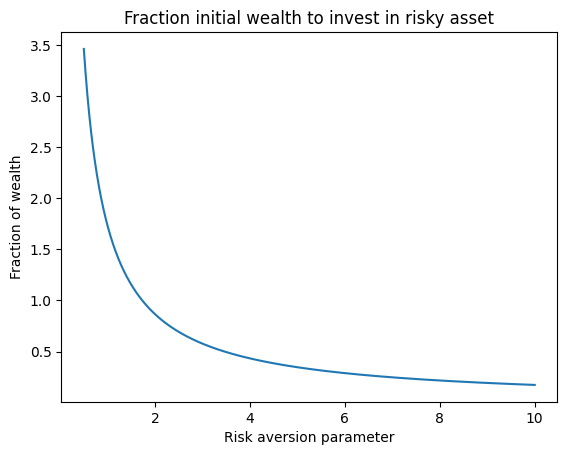

In [ ]:
gammas = np.linspace(0.5, 10,1000)
plt.title("Fraction initial wealth to invest in risky asset")
plt.plot(gammas, (dailyMu-dailyr)/(gammas*(dailySigma**2)))
plt.xlabel("Risk aversion parameter")
plt.ylabel("Fraction of wealth")

In [ ]:
totalAssets

,totalLiabilities
DATE,
2002,0.0
2003,0.0
2004,0.0
2005,0.0
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

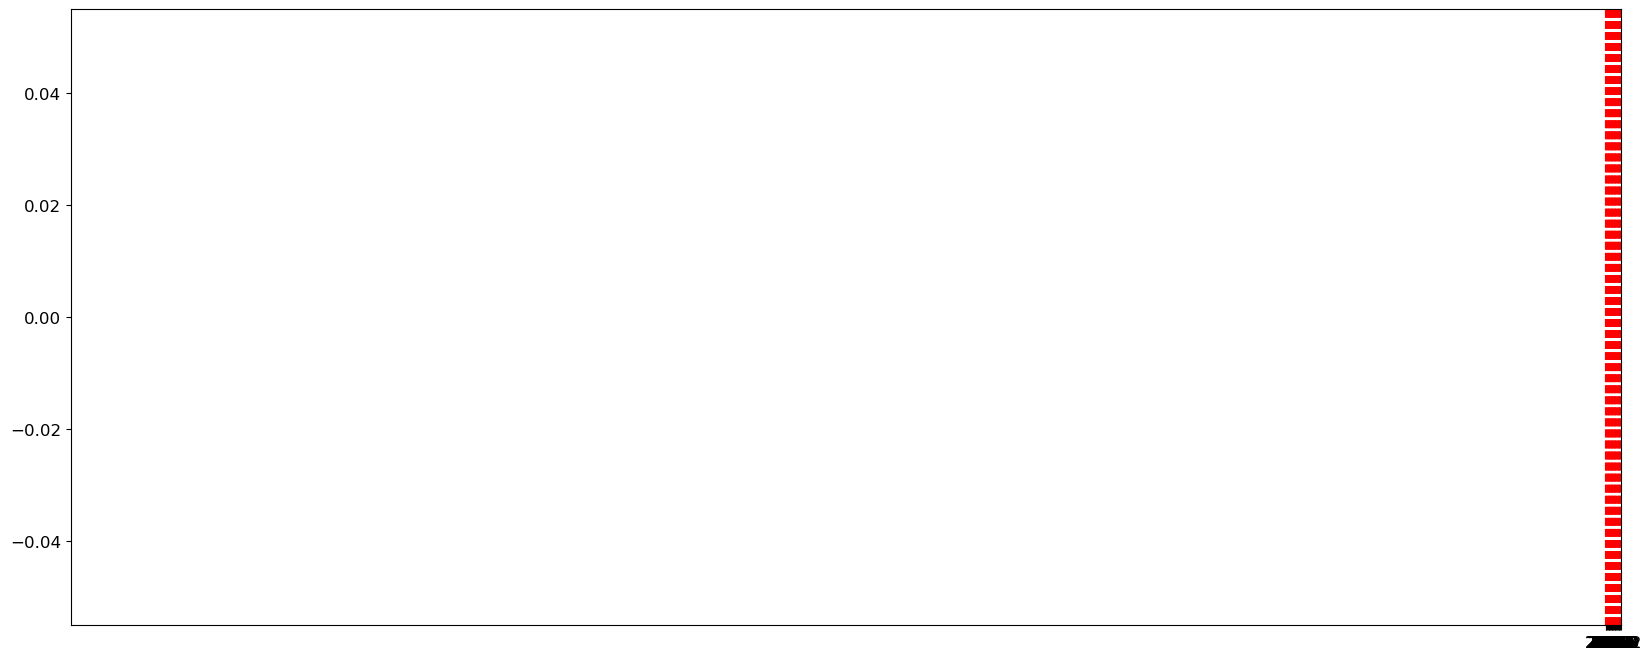

In [ ]:
totalDeposit = aggregateSumOverYears("TOTAL DEPOSITS", 
                          "totalDeposits", 
                          2002,
                          2022)
totalAssets = aggregateSumOverYears("TOTAL LIABILITIES AND MINORITY INTEREST", 
                          "totalLiabilities", 
                          2002,
                          2022)   

plt.plot(range(2002,2023),totalDeposit.values / totalAssets.values)
plt.xticks(range(2002,2023))
for i in range(2002,2023):
    plt.axvline(x=i, color='r', linestyle='--')
for x,y in zip(range(2002,2023) ,(totalDeposit.values / totalAssets.values).flatten().round(2)):
    plt.text(x, y, str(y), fontsize=15)